In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sacc
import os

In [4]:
def make_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [5]:
dir = '../data_vectors/cosmodc2/june_2021/7sbins_noshapenoise/'

file = 'twopoint_data_real.sacc' 
d = sacc.Sacc.load_fits(dir+file)
file = 'twopoint_theory_real.sacc'
t = sacc.Sacc.load_fits(dir+file)

file = 'summary_statistics_real.sacc'
t_cov = sacc.Sacc.load_fits(dir+file)
make_directory(dir + 'plots/')
for dt in d.get_data_types():
        print(dt)
print ('----')
for dt in t.get_data_types():
        print(dt)
print ('----') 


### Load the new measurements with shape noise
d_sn = sacc.Sacc.load_fits('../data_vectors/cosmodc2/june_2021/7sbins/'+'twopoint_data_real.sacc')
t_cov_sn = sacc.Sacc.load_fits('../data_vectors/cosmodc2/june_2021/7sbins/'+'summary_statistics_real.sacc')

galaxy_density_xi
galaxy_shearDensity_xi_t
galaxy_shear_xi_minus
galaxy_shear_xi_plus
----
galaxy_density_xi
galaxy_shearDensity_xi_t
galaxy_shear_xi_minus
galaxy_shear_xi_plus
----


In [6]:
W = "galaxy_density_xi"
GAMMA = "galaxy_shearDensity_xi_t"
GAMMAX = "galaxy_shearDensity_xi_x"
XIP = "galaxy_shear_xi_plus"
XIM = "galaxy_shear_xi_minus"
EE = "galaxy_shear_cl_ee"
DD = "galaxy_density_cl"
ED = "galaxy_shearDensity_cl_e"

In [7]:
c = ['teal', 'powderblue', 'orange',  'cornflowerblue', 'tomato',  'gray']
zs = [0.19285902, 0.40831394, 0.65503818, 0.94499109, 1.2947086, 1.72779632, 2.27855242, 3. ] 
#zs = [0.25588604, 0.55455363, 0.91863365, 1.38232001, 2.]
nsbins = len(zs)-1
def convert_to_z_labels(z):
    return ['$%0.2f < z < %0.2f$'%(z[i], z[i+1]) for i in range(len(z)-1)]
zs_labels = convert_to_z_labels(zs)
print(zs_labels)

['$0.19 < z < 0.41$', '$0.41 < z < 0.66$', '$0.66 < z < 0.94$', '$0.94 < z < 1.29$', '$1.29 < z < 1.73$', '$1.73 < z < 2.28$', '$2.28 < z < 3.00$']


In [8]:
# Lens sample
#bias = [1.5072027242407953,1.6082181958189865,1.8178246095034942,2.048489947488239,2.2097622593632282] 
bias = [1.51558685451494,1.6190473318747722,1.8262089226442932,2.058821715971039,2.2326531306947452] # Using sheth99 for hmf
bias = [1.4866172616772526, 1.5517715342486946, 1.7754559342272285, 1.984537428785472, 2.180968917346998] # using interpolated cosmodc2 + sheth01 for the bias
#bias = [1.2702195493705768, 1, 1, 1.670721270656689, 1.8421043630813438]
zl = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
nlbins = len(zl)-1
zl_labels = convert_to_z_labels(zl)
print(zl_labels)

['$0.15 < z < 0.30$', '$0.30 < z < 0.45$', '$0.45 < z < 0.60$', '$0.60 < z < 0.75$', '$0.75 < z < 0.90$']


## Load covariance from CosmoCov

In [9]:
path_cosmocov = '../data_vectors/cosmodc2/7sbins/'+ 'cov_CosmoCOV/'

In [10]:
def get_cov(filename):

        data = np.genfromtxt(filename)
        ndata = int(np.max(data[:,0]))+1

        print("Dimension of cov: %dx%d"%(ndata,ndata))

        ndata_min = int(np.min(data[:,0]))
        cov_g = np.zeros((ndata,ndata))
        cov_ng = np.zeros((ndata,ndata))
        for i in range(0,data.shape[0]):
                cov_g[int(data[i,0]),int(data[i,1])] =data[i,8]
                cov_g[int(data[i,1]),int(data[i,0])] =data[i,8]
                cov_ng[int(data[i,0]),int(data[i,1])] =data[i,9]
                cov_ng[int(data[i,1]),int(data[i,0])] =data[i,9]

        return cov_g, cov_ng, ndata, data
    
def get_cov_same_ordering_TXPipe(filename):
        n_th = 15
        
        data = np.genfromtxt(filename)
        ndata = int(np.max(data[:,0]))+1

        print("Dimension of cov: %dx%d"%(ndata,ndata))

        ndata_min = int(np.min(data[:,0]))
        cov_g = np.zeros((ndata,ndata))
        
        # Find what index corresponds to in the CosmoCov covariance. z1s and z2s indicate the zbinning for each index
        indexes = []
        z1s = []
        z2s = []
        for i in range(0,data.shape[0]):
            if i%n_th==0 and i<ndata:
                index, _, _ , z1, z2 = np.genfromtxt(path_cosmocov + 'order_no_shape_noise_i_%d-%d'%(i, i + n_th-1), dtype ='str', unpack = True)
                indexes.extend([int(j) for j in index])
                z1s.extend(z1)
                z2s.extend(z2)

        # now figure out the order we want things in
        nzbins = 7
        source1 = []
        source2 = []
        for zbin1 in range(nzbins):
            for zbin2 in range(nzbins):
                if zbin1>=zbin2:
                    # this is the order TXPipe uses
                    source1.append('s%d'%zbin1)
                    source2.append('s%d'%zbin2)
        print(source1, source2)

        # Now construct the covariance in the order we want it:
        count = 0
        for i in range(0,data.shape[0]):
            if i%n_th==0 and i<ndata: 
                count += 1 
                print(source1[count], source2[count])
                
                mask = np.in1d(z1s,source1[count])&np.in1d(z2s,source2[count])
                
            
            cov_g[int(data[i,0]),int(data[i,1])] = data[i,8]
            cov_g[int(data[i,1]),int(data[i,0])] = data[i,8]

        
        return cov_g, ndata
    
def corrmatrix(cov):
    cov = np.mat(cov)
    D = np.diag(np.sqrt(np.diag(cov)))
    d = np.linalg.inv(D)
    corr = d*cov*d
    return corr

def plot_cov(cov, size):
    
    ncov1 = len(cov)
    ncov2 = len(cov[0])
    
    corr = corrmatrix(cov)
    cov_vmin = np.min(corr)
    
    figsize1 = 1.22222222227*ncov1/size
    figsize2 = ncov2/size
    fig, ax = plt.subplots(1, 1, figsize=(figsize1, figsize2))
    im = ax.imshow(corr, interpolation='nearest',
                           aspect='auto', origin='lower', vmin=-0.5, vmax=1.)
    cbar = fig.colorbar(im)
    return fig

def get_xip_diag(file):
    #xip_cov = file.covariance.covmat[750:1170].T[750:1170]
    xip_cov = file.covariance.covmat[1170:].T[1170:]
    return np.sqrt(np.diag(xip_cov))

In [11]:
cov_g_original, _, ndata, data = get_cov(path_cosmocov + 'gaussian_xip/cov_cosmodc2_xip')
cov_g, cov_ng, ndata, data = get_cov(path_cosmocov + 'non-gaussian_xip/cov_cosmodc2_xip_ng')
cov_g_sn, cov_ng_sn, ndata_sn, data_sn = get_cov(path_cosmocov + 'non-gaussian_xip_with_shape_noise/cov_cosmodc2_xip_ng_with_sn')
cov_g_lsst, cov_ng_lsst, ndata_sn, data_sn = get_cov(path_cosmocov + 'lsst_y1_non-gaussian_xip/cov_cosmodc2_lsst_y1_xip')
#
#

Dimension of cov: 420x420
Dimension of cov: 420x420
Dimension of cov: 420x420
Dimension of cov: 420x420


In [12]:
CosmoCov_xip = np.sqrt(np.diag(cov_g_original))
CosmoCov_xip_g = np.sqrt(np.diag(cov_g))
CosmoCov_xip_ng = np.sqrt(np.diag(cov_ng))
CosmoCov_xip_total = np.sqrt(np.diag(cov_ng + cov_g))

# with shape noise
CosmoCov_xip_g_sn = np.sqrt(np.diag(cov_g_sn))
CosmoCov_xip_ng_sn = np.sqrt(np.diag(cov_ng_sn))
CosmoCov_xip_total_sn = np.sqrt(np.diag(cov_ng_sn + cov_g_sn))

# the lsst y1
CosmoCov_xip_g_lsst = np.sqrt(np.diag(cov_g_lsst))
CosmoCov_xip_ng_lsst = np.sqrt(np.diag(cov_ng_lsst))
CosmoCov_xip_total_lsst = np.sqrt(np.diag(cov_ng_lsst + cov_g_lsst))

# without shape noise
JK_xip = get_xip_diag(d)
txpipe_xip = get_xip_diag(t_cov)

# new run with shape noise
JK_xip_sn = get_xip_diag(d_sn)
txpipe_xip_sn = get_xip_diag(t_cov_sn)

In [13]:
# Find what index corresponds to in the CosmoCov covariance. z1s and z2s indicate the zbinning for each index
indexes = []
z1s = []
z2s = []
n_th = 15
for i in range(0,data.shape[0]):
        if i%n_th==0 and i<ndata:
            index, _, _ , z1, z2 = np.genfromtxt(path_cosmocov + 'gaussian_xip/order_no_shape_noise_i_%d-%d'%(i, i + n_th-1), dtype ='str', unpack = True)
            indexes.extend([int(j) for j in index])
            z1s.extend(z1)
            z2s.extend(z2)

# now figure out the order we want things in
nzbins = 7
source1 = []
source2 = []
for zbin1 in range(nzbins):
        for zbin2 in range(nzbins):
            if zbin1>=zbin2:
                # this is the order TXPipe uses
                source1.append('s%d'%zbin1)
                source2.append('s%d'%zbin2)
print(source1, source2)


['s0', 's1', 's1', 's2', 's2', 's2', 's3', 's3', 's3', 's3', 's4', 's4', 's4', 's4', 's4', 's5', 's5', 's5', 's5', 's5', 's5', 's6', 's6', 's6', 's6', 's6', 's6', 's6'] ['s0', 's0', 's1', 's0', 's1', 's2', 's0', 's1', 's2', 's3', 's0', 's1', 's2', 's3', 's4', 's0', 's1', 's2', 's3', 's4', 's5', 's0', 's1', 's2', 's3', 's4', 's5', 's6']


In [14]:
count = 0
n_th=15
ndata = 420
reorder_CosmoCov_xip = np.zeros(ndata)
reorder_CosmoCov_xip_g = np.zeros(ndata)
reorder_CosmoCov_xip_ng = np.zeros(ndata)
reorder_CosmoCov_xip_total = np.zeros(ndata)

#
reorder_CosmoCov_xip_g_sn = np.zeros(ndata)
reorder_CosmoCov_xip_ng_sn = np.zeros(ndata)
reorder_CosmoCov_xip_total_sn = np.zeros(ndata)

#
reorder_CosmoCov_xip_g_lsst = np.zeros(ndata)
reorder_CosmoCov_xip_ng_lsst = np.zeros(ndata)
reorder_CosmoCov_xip_total_lsst = np.zeros(ndata)


for i in range(0,ndata):
    if i%n_th==0 and i<ndata:       
        #print(source2[count], source1[count])     
        mask = np.in1d(z1s,source2[count])&np.in1d(z2s,source1[count])
        reorder_CosmoCov_xip[i:i+n_th] = CosmoCov_xip[mask]
        reorder_CosmoCov_xip_g[i:i+n_th] = CosmoCov_xip_g[mask]
        reorder_CosmoCov_xip_ng[i:i+n_th] = CosmoCov_xip_ng[mask]
        reorder_CosmoCov_xip_total[i:i+n_th] = CosmoCov_xip_total[mask]
        
        
        reorder_CosmoCov_xip_g_sn[i:i+n_th] = CosmoCov_xip_g_sn[mask]
        reorder_CosmoCov_xip_ng_sn[i:i+n_th] = CosmoCov_xip_ng_sn[mask]
        reorder_CosmoCov_xip_total_sn[i:i+n_th] = CosmoCov_xip_total_sn[mask]
        
        reorder_CosmoCov_xip_g_lsst[i:i+n_th] = CosmoCov_xip_g_lsst[mask]
        reorder_CosmoCov_xip_ng_lsst[i:i+n_th] = CosmoCov_xip_ng_lsst[mask]
        reorder_CosmoCov_xip_total_lsst[i:i+n_th] = CosmoCov_xip_total_lsst[mask]
        count += 1 
    

In [15]:
def covpairs(covi):
    d = {}
    for i,p in enumerate(pairs): 
        d[p] = covi[i*20:i*20+20,i*20:i*20+20]
    return d

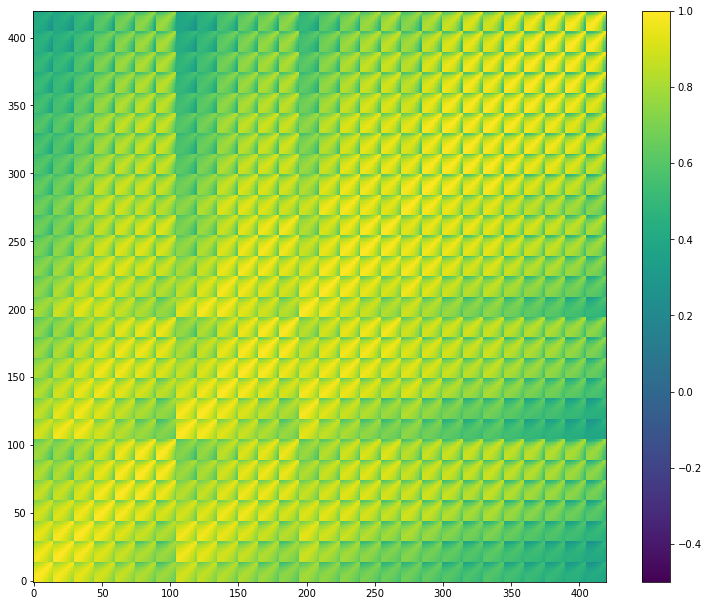

In [17]:
fig = plot_cov(cov_g, 40.)

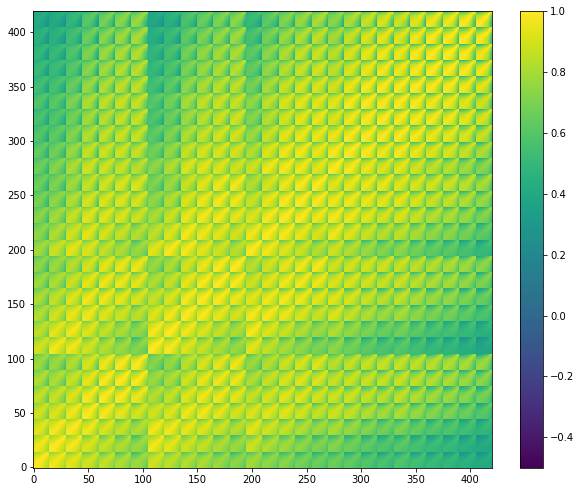

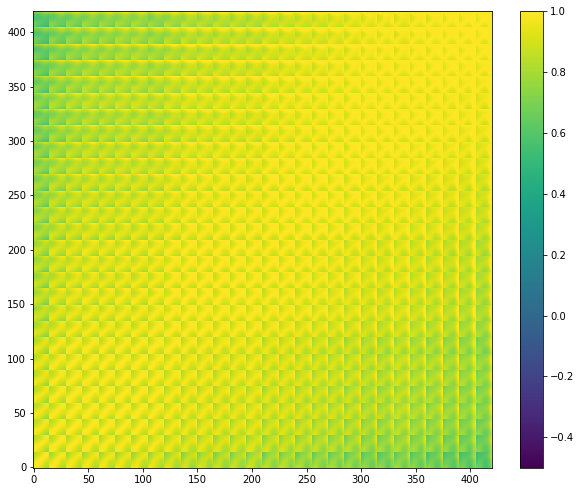

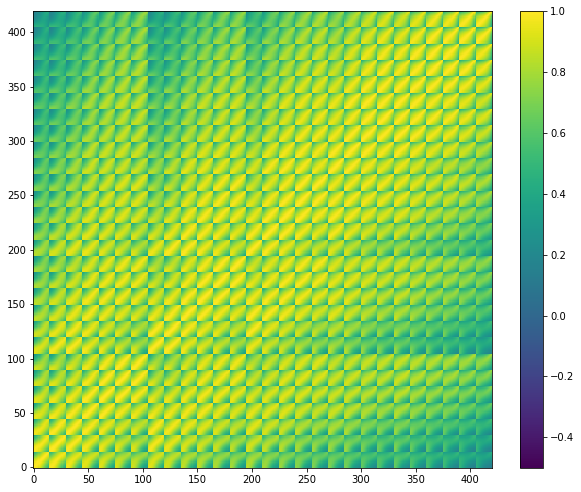

In [18]:
fig = plot_cov(cov_g, 50.)
fig = plot_cov(cov_ng, 50.)
fig = plot_cov(cov_g + cov_ng, 50.)

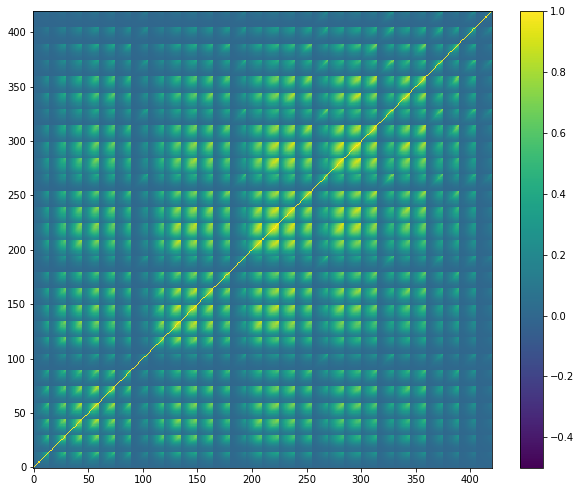

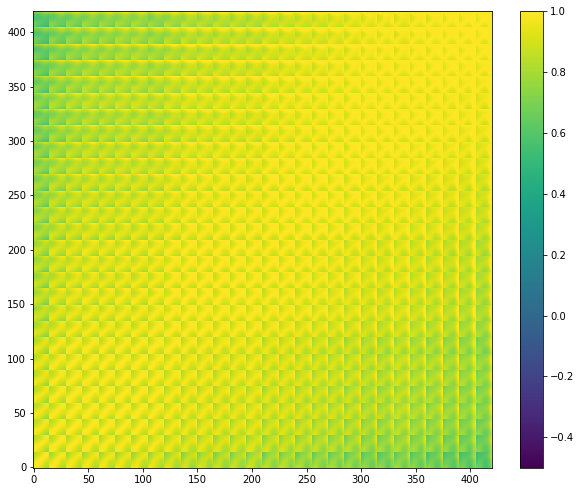

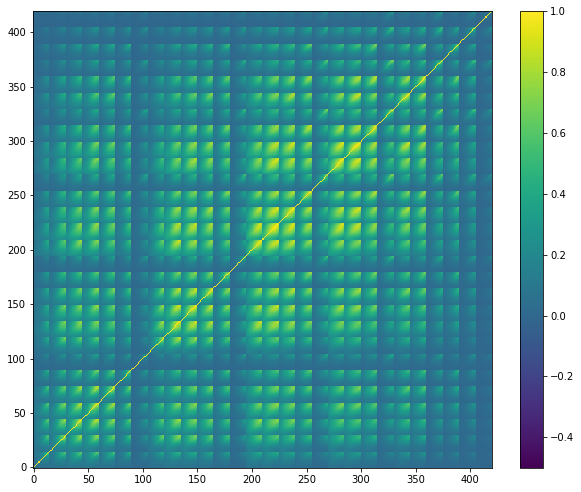

In [19]:
fig = plot_cov(cov_g_sn, 50.)
fig = plot_cov(cov_ng_sn, 50.)
fig = plot_cov(cov_g_sn+cov_ng_sn, 50.)
#fig = plot_cov(cov_ng_sn, 50.)

In [20]:
d.get_data_points(XIP)

[DataPoint(data_type='galaxy_shear_xi_plus', tracers=('source_0', 'source_0'), value=9.989130071397453e-06, theta=2.855369775739194, error=4.73798175986475e-07, npair=164551833.0, weight=164551833.0),
 DataPoint(data_type='galaxy_shear_xi_plus', tracers=('source_0', 'source_0'), value=8.533939903557636e-06, theta=3.6514445855295494, error=4.198022855133492e-07, npair=267846602.0, weight=267846602.0),
 DataPoint(data_type='galaxy_shear_xi_plus', tracers=('source_0', 'source_0'), value=6.834723572827476e-06, theta=4.669512813062135, error=3.5901880974396663e-07, npair=436038843.0, weight=436038843.0),
 DataPoint(data_type='galaxy_shear_xi_plus', tracers=('source_0', 'source_0'), value=5.578467771540215e-06, theta=5.971367241696387, error=3.0764817361641385e-07, npair=709893430.0, weight=709893430.0),
 DataPoint(data_type='galaxy_shear_xi_plus', tracers=('source_0', 'source_0'), value=4.449912791416429e-06, theta=7.636216361596356, error=2.5846901643733395e-07, npair=1155690801.0, weight=

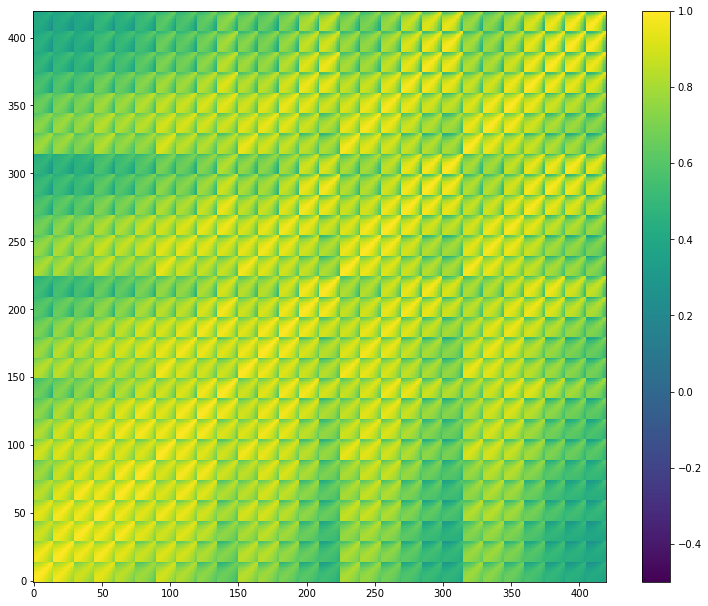

In [22]:
cov = plot_cov(t_cov.covariance.covmat[1170:].T[1170:], 40)

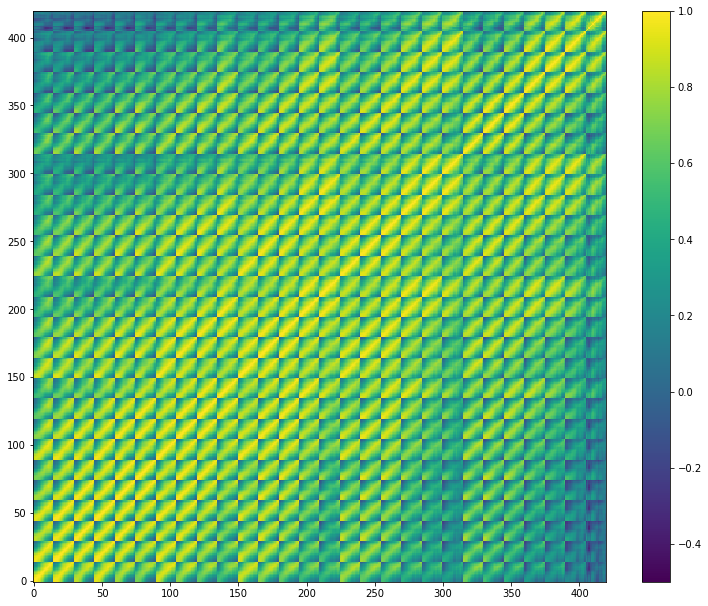

In [23]:
cov = plot_cov(d.covariance.covmat[1170:].T[1170:], 40)

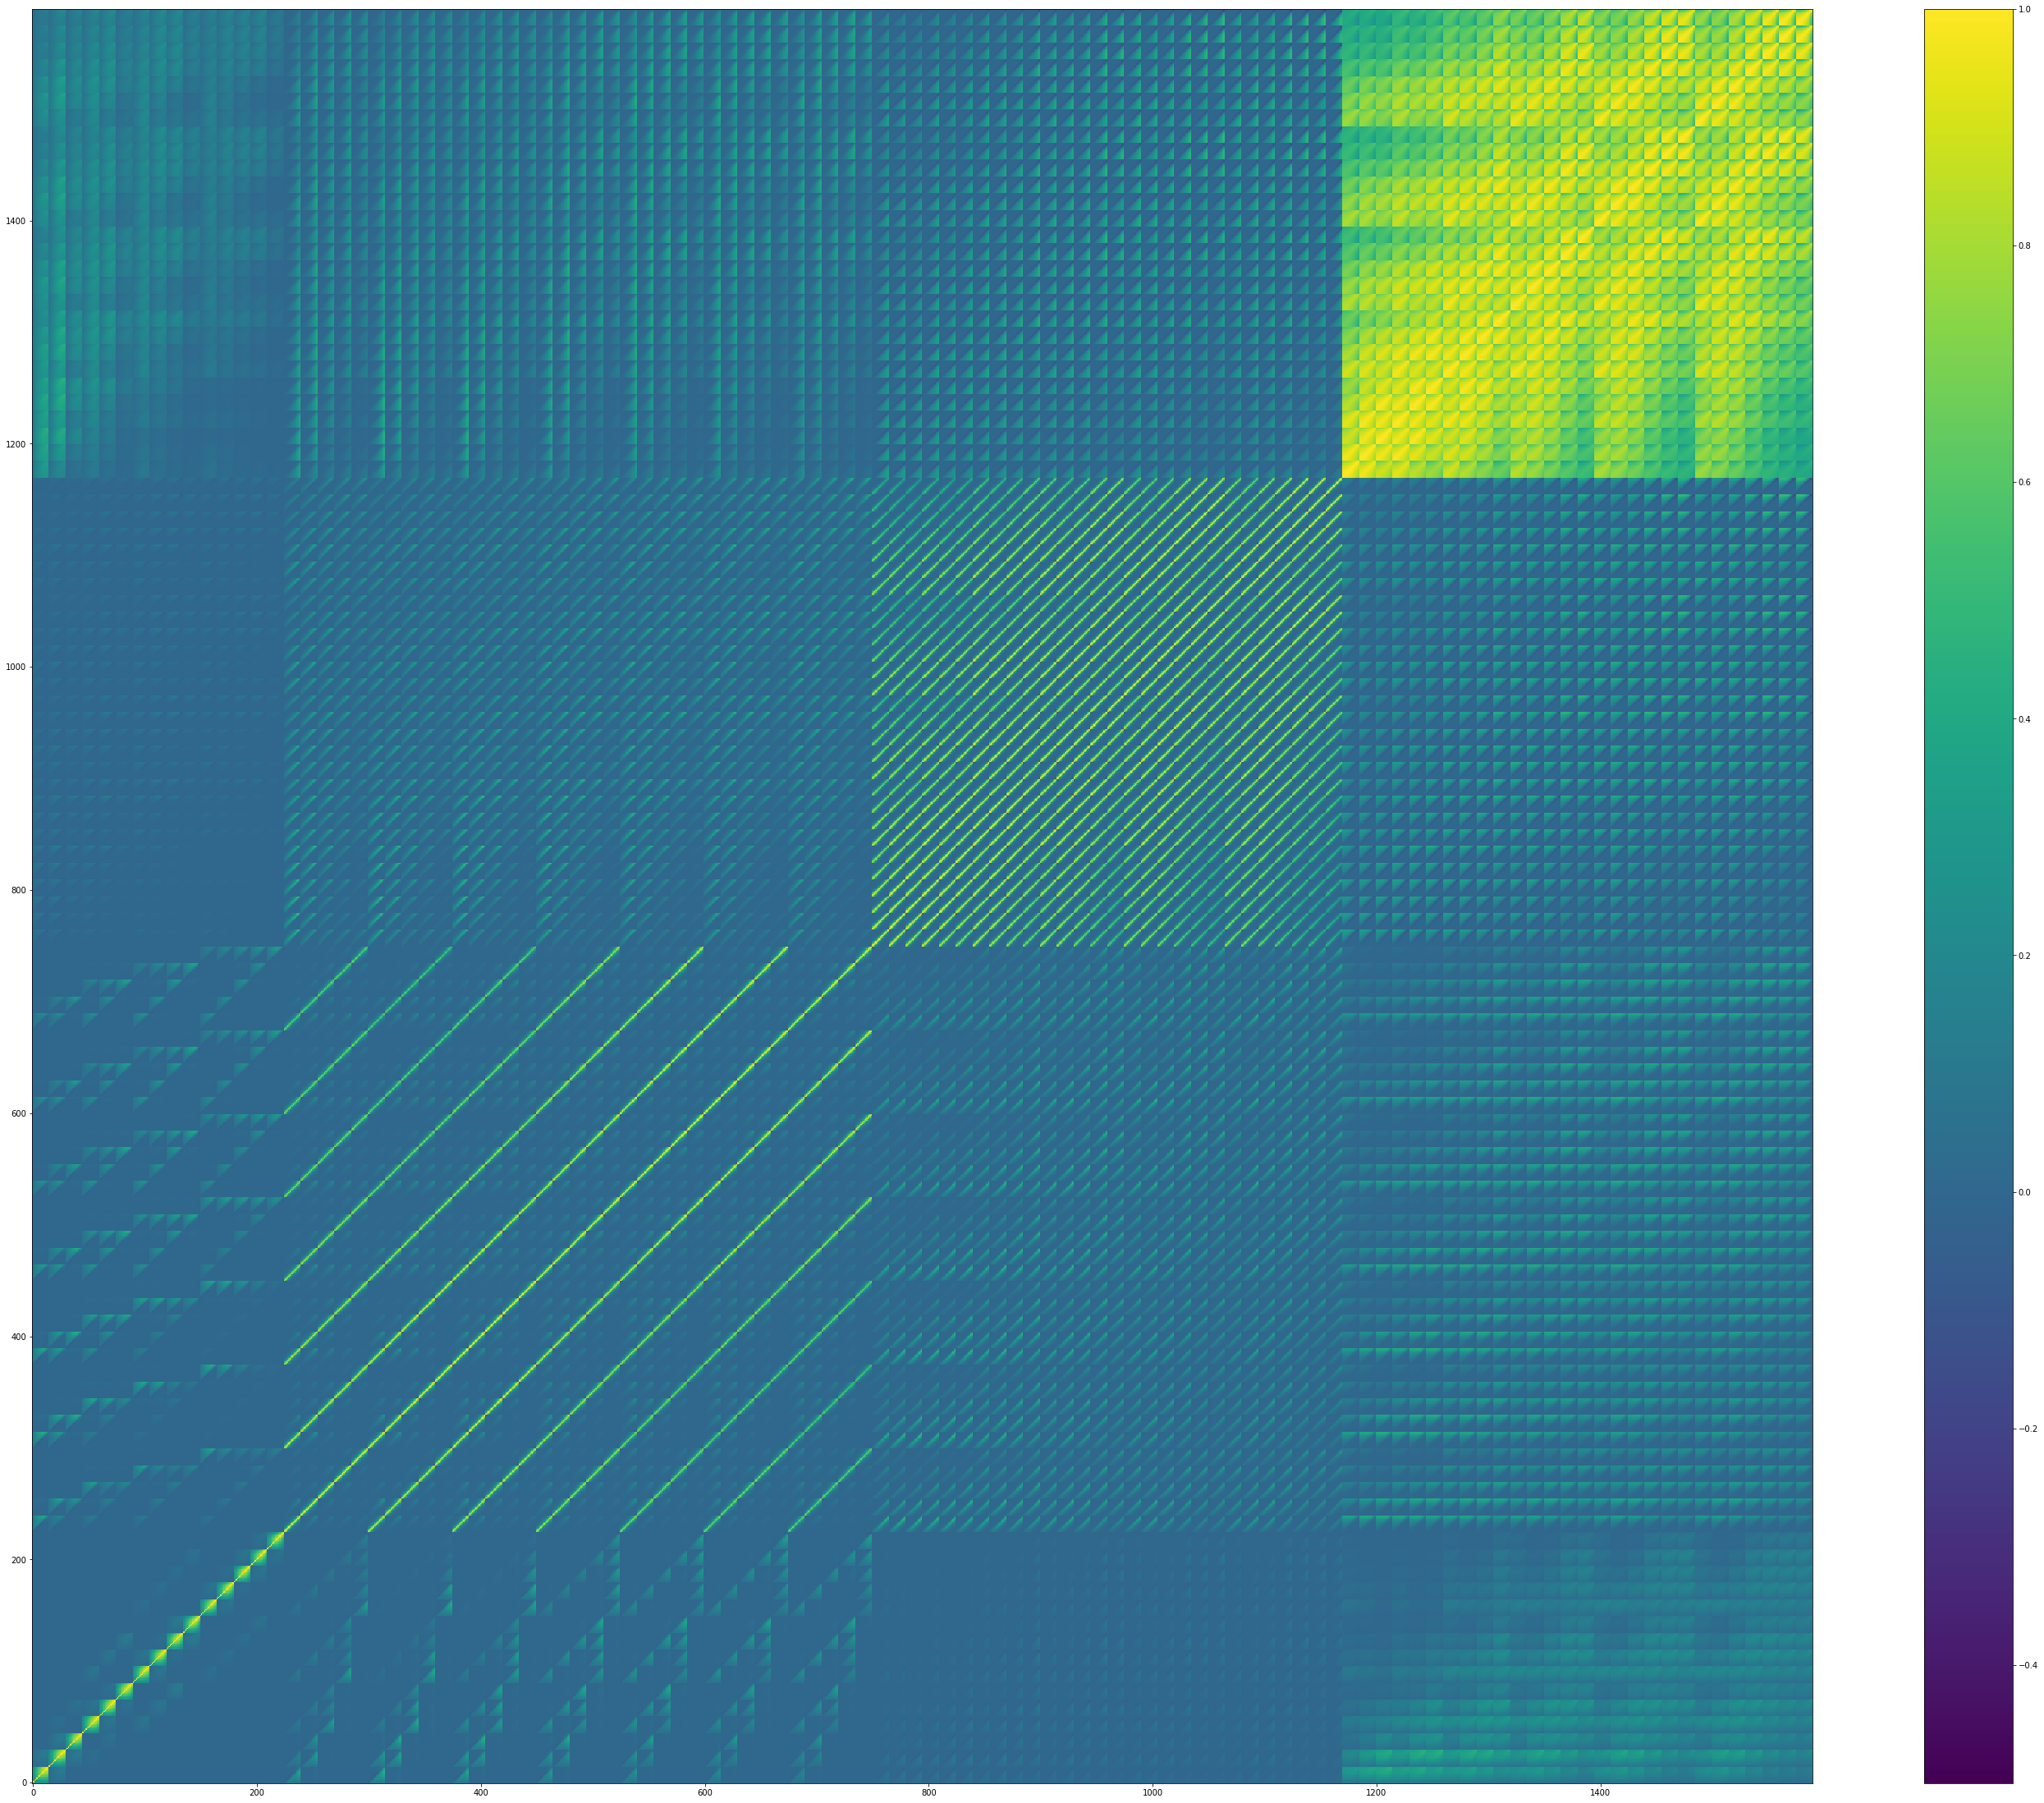

In [24]:
cov = plot_cov(t_cov.covariance.covmat, 40)

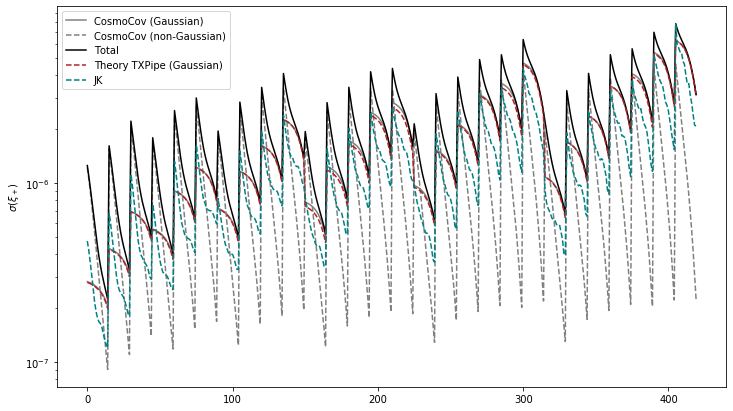

In [25]:
plt.figure(figsize = (12, 7))
#plt.plot(np.arange(420), CosmoCov_xip, color = 'orange', label = 'CosmoCov (original order)')
#plt.plot(np.arange(420), reorder_CosmoCov_xip, color = 'black', label = 'CosmoCov')

plt.plot(np.arange(420), reorder_CosmoCov_xip_g, '-', color = 'gray', label = 'CosmoCov (Gaussian)')
plt.plot(np.arange(420), reorder_CosmoCov_xip_ng, '--', color = 'gray', label = 'CosmoCov (non-Gaussian)')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total, '-', color = 'black', label = 'Total')
plt.plot(np.arange(420),  txpipe_xip, '--', color = 'firebrick', label = 'Theory TXPipe (Gaussian)')
plt.plot(np.arange(420), JK_xip,  '--', color = 'teal',label = 'JK')

plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend()
plt.yscale('log')

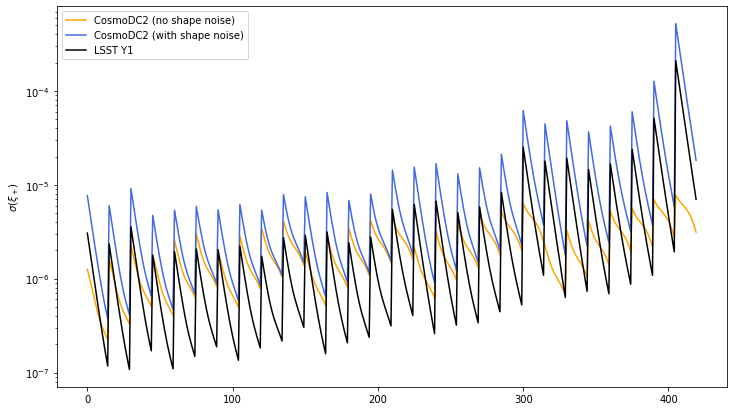

In [73]:
plt.figure(figsize = (12, 7))
#plt.plot(np.arange(420), CosmoCov_xip, color = 'orange', label = 'CosmoCov (original order)')
#plt.plot(np.arange(420), reorder_CosmoCov_xip, color = 'black', label = 'CosmoCov')

#plt.plot(np.arange(420), reorder_CosmoCov_xip_g, '-', color = 'gray', label = 'CosmoCov (Gaussian)')
#plt.plot(np.arange(420), reorder_CosmoCov_xip_ng, '--', color = 'gray', label = 'CosmoCov (non-Gaussian)')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total, '-', color = 'orange', label = 'CosmoDC2 (no shape noise)')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total_sn, '-', color = 'royalblue', label = 'CosmoDC2 (with shape noise)')
#plt.plot(np.arange(420),  txpipe_xip, '--', color = 'firebrick', label = 'Theory TXPipe (Gaussian)')
#plt.plot(np.arange(420), JK_xip,  '--', color = 'teal',label = 'JK')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total_lsst, '-', color = 'black', label = 'LSST Y1')

plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend()
plt.yscale('log')
plt.savefig('../plots/covariance_lsst_vs_cosmodc2.png', dpi = 300)

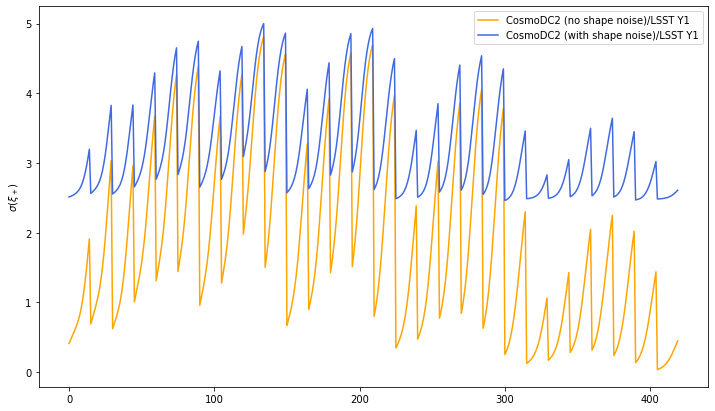

In [74]:
plt.figure(figsize = (12, 7))
plt.plot(np.arange(420), reorder_CosmoCov_xip_total/reorder_CosmoCov_xip_total_lsst, '-', color = 'orange', label = 'CosmoDC2 (no shape noise)/LSST Y1')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total_sn/reorder_CosmoCov_xip_total_lsst, '-', color = 'royalblue', label = 'CosmoDC2 (with shape noise)/LSST Y1')
plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend()
plt.savefig('../plots/covariance_lsst_vs_cosmodc2_ratio.png', dpi = 300)
#plt.yscale('log')

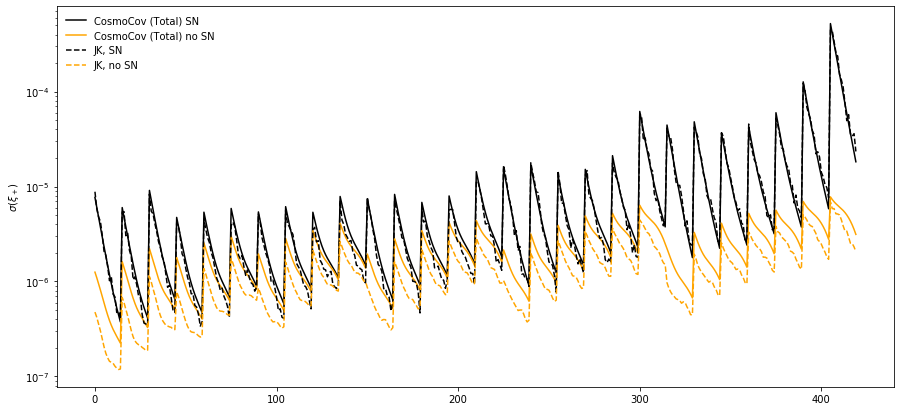

In [75]:
plt.figure(figsize = (15, 7))


#plt.plot(np.arange(420), reorder_CosmoCov_xip_g_sn, '-', color = 'gray', label = 'CosmoCov (Gaussian) SN')
#plt.plot(np.arange(420), reorder_CosmoCov_xip_ng_sn, '--', color = 'gray', label = 'CosmoCov (non-Gaussian) SN')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total_sn, '-', color = 'black', label = 'CosmoCov (Total) SN')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total, '-', color = 'orange', label = 'CosmoCov (Total) no SN')
#plt.plot(np.arange(420), CosmoCov_xip_ng_sn, color = 'black', label = 'CosmoCov (non-Gaussian) with SN')
#plt.plot(np.arange(420), CosmoCov_xip_g_sn, color = 'gray', label = 'CosmoCov (Gaussian) with SN')

#plt.plot(np.arange(420), txpipe_xip_sn, ':', color = 'black', label = 'TXPipe theory, SN')
#plt.plot(np.arange(420), txpipe_xip, ':', color = 'orange', label = 'TXPipe theory, no SN')

plt.plot(np.arange(420), JK_xip_sn, '--', color = 'black', label = 'JK, SN')
plt.plot(np.arange(420), JK_xip, '--', color = 'orange', label = 'JK, no SN')

plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend(frameon=False)
plt.yscale('log')
plt.savefig('../plots/cov_comparison_theory_vs_JK.png', dpi = 300)

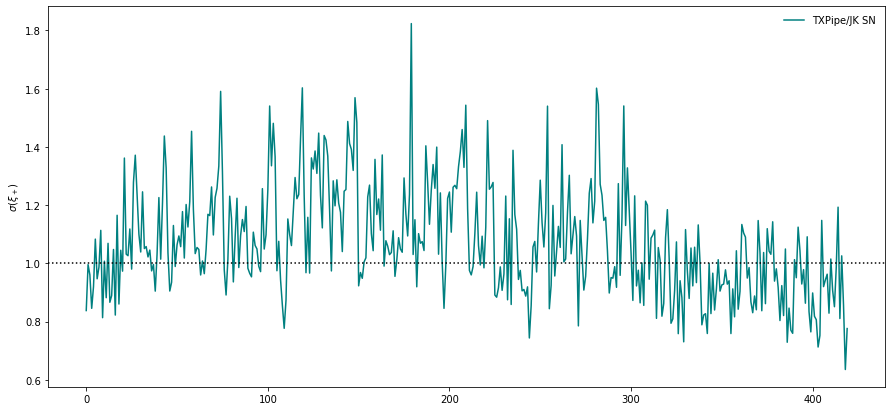

In [76]:
plt.figure(figsize = (15, 7))



#plt.plot(np.arange(420), reorder_CosmoCov_xip_total_sn/JK_xip_sn, '-', color = 'teal', label = 'CosmoCov (Total)/JK SN')
#plt.plot(np.arange(420), reorder_CosmoCov_xip_total/JK_xip, '-', color = 'orange', label = 'CosmoCov (Total)/JK no SN')

plt.plot(np.arange(420), txpipe_xip_sn/JK_xip_sn, '-', color = 'teal', label = 'TXPipe/JK SN')
#plt.plot(np.arange(420), txpipe_xip/JK_xip, '--', color = 'orange', label = 'TXPipe/JK no SN')

plt.axhline(y=1, color = 'k', ls = ':' )
plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend(frameon=False)
plt.savefig('../plots/cov_comparison_theory_vs_JK_ratio_SN.png', dpi = 300)
#plt.yscale('log')

## Compare all with shape noise

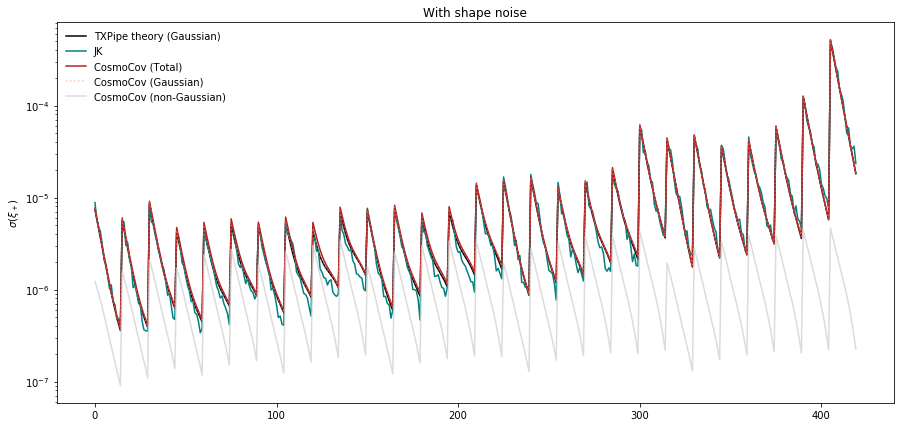

In [77]:
plt.figure(figsize = (15, 7))

plt.plot(np.arange(420), txpipe_xip_sn, '-', color = 'black', label = 'TXPipe theory (Gaussian)')
plt.plot(np.arange(420), JK_xip_sn, '-', color = 'teal', label = 'JK')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total_sn, '-', color = 'firebrick', label = 'CosmoCov (Total)')
plt.plot(np.arange(420), reorder_CosmoCov_xip_g_sn, ':', color = 'salmon', label = 'CosmoCov (Gaussian)', alpha = 0.5)
plt.plot(np.arange(420), reorder_CosmoCov_xip_ng_sn, '-', color = 'lightgray', label = 'CosmoCov (non-Gaussian)', alpha = 0.8)


plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend(frameon=False)
plt.yscale('log')
plt.title('With shape noise')
plt.savefig('../plots/cov_comparison_cosmocov_vs_txpipe_theory_SN.png', dpi = 400)

## Compare all without shape noise

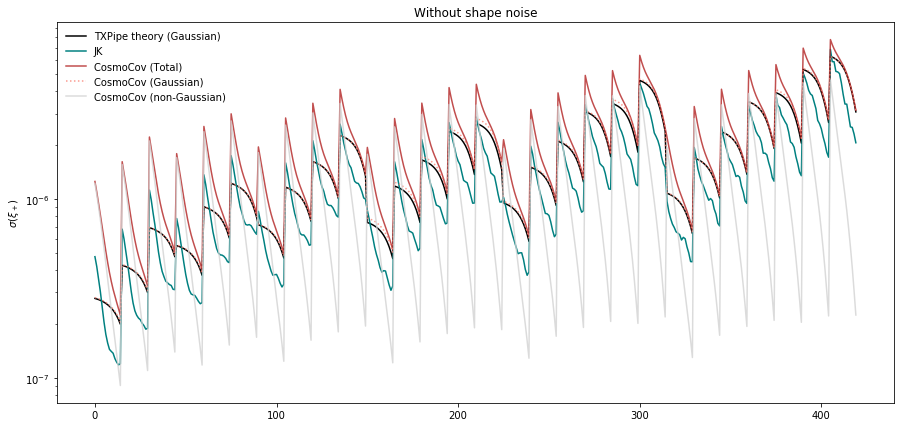

In [78]:
plt.figure(figsize = (15, 7))

plt.plot(np.arange(420), txpipe_xip, '-', color = 'black', label = 'TXPipe theory (Gaussian)')
plt.plot(np.arange(420), JK_xip, '-', color = 'teal', label = 'JK')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total, '-', color = 'firebrick', label = 'CosmoCov (Total)', alpha =0.8)
plt.plot(np.arange(420), reorder_CosmoCov_xip_g, ':', color = 'salmon', label = 'CosmoCov (Gaussian)', alpha =0.8)
plt.plot(np.arange(420), reorder_CosmoCov_xip_ng, '-', color = 'lightgray', label = 'CosmoCov (non-Gaussian)', alpha =0.8)



plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend(frameon=False)
plt.yscale('log')
plt.title('Without shape noise')
plt.savefig('../plots/cov_comparison_cosmocov_vs_txpipe_theory_noSN.png', dpi = 400)

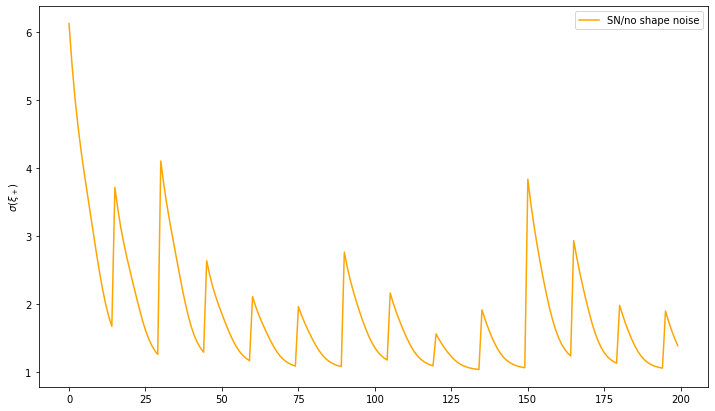

In [79]:
plt.figure(figsize = (12, 7))

plt.plot(np.arange(420)[:200], reorder_CosmoCov_xip_total_sn[:200]/reorder_CosmoCov_xip_total[:200], '-', color = 'orange', label = 'SN/no shape noise')
#plt.plot(np.arange(420), CosmoCov_xip_ng_sn, color = 'black', label = 'CosmoCov (non-Gaussian) with SN')
#plt.plot(np.arange(420), CosmoCov_xip_g_sn, color = 'gray', label = 'CosmoCov (Gaussian) with SN')


plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend()
#plt.yscale('log')

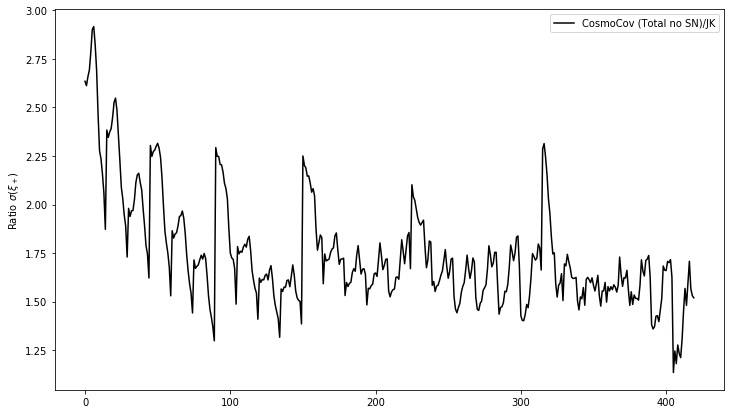

In [80]:
plt.figure(figsize = (12, 7))
#plt.plot(np.arange(420), CosmoCov_xip, color = 'orange', label = 'CosmoCov (original order)')
#plt.plot(np.arange(420), reorder_CosmoCov_xip, color = 'black', label = 'CosmoCov')

plt.plot(np.arange(420), (reorder_CosmoCov_xip_total)/JK_xip, color = 'black', label = 'CosmoCov (Total no SN)/JK')
#plt.plot(np.arange(420), reorder_CosmoCov_xip_ng/reorder_CosmoCov_xip_g, color = 'teal', label = 'CosmoCov (non-Gaussian)/CosmoCov (Gaussian)')
#plt.plot(np.arange(420), reorder_CosmoCov_xip_g/JK_xip, color = 'orange', label = 'CosmoCov (Gaussian)/JK')
#plt.plot(np.arange(420), reorder_CosmoCov_xip_g, '-', color = 'gray', label = 'CosmoCov (Gaussian)')
#plt.plot(np.arange(420),  txpipe_xip, '--', color = 'firebrick', label = 'Theory TXPipe (Gaussian)')
#plt.plot(np.arange(420), JK_xip,  '--', color = 'teal',label = 'JK')

plt.ylabel(r'Ratio $\sigma(\xi_+$)')
plt.legend()

galaxy_shear_xi_plus


<Figure size 432x288 with 0 Axes>

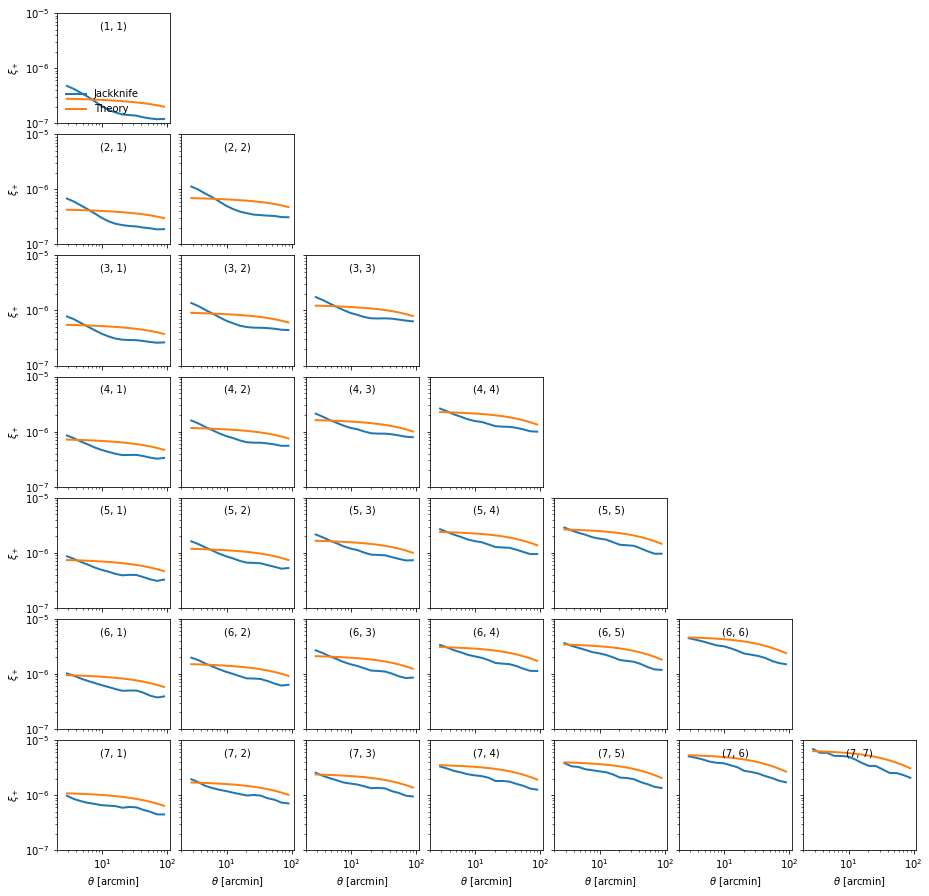

In [52]:
fig = plot_errorbars(d, theory=t, theory_cov = t_cov, datatype=XIP, ratios = False)
#plt.savefig(dir + 'plots/' + 'xip_errors.png', dpi = 300)

In [51]:
def plot_errorbars(s, theory=None, theory_cov = None, datatype=None, ratios = False):
      
    for dt in s.get_data_types():
        
        if dt == XIP or dt == XIM:
            nbins1 = nsbins
            nbins2 = nsbins
            name1 = 'source'
            name2 = 'source'
        
        if dt == GAMMA:
            nbins1 = nsbins
            nbins2 = nlbins
            name1 = 'source'
            name2 = 'lens'

        if dt == W:
            nbins1 = nlbins
            nbins2 = nlbins
            name1 = 'lens'
            name2 = 'lens'
            
        if dt == datatype:
            print(dt)
            plt.clf()
            if dt == GAMMA:
                fig, ax = plt.subplots(nbins1, nbins2, figsize=(2.2*nbins1, 3.2*nbins2), sharey=True, sharex=True)
            else:
                fig, ax = plt.subplots(nbins1, nbins2, figsize=(2.2*nbins1, 2.2*nbins2), sharey=True, sharex=True)
            plt.subplots_adjust(wspace=0.1, hspace=0.1)

            for i in range(nbins1):
                for j in range(nbins2):

                    theta, xi, cov = s.get_theta_xi(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = True)
                    err = np.sqrt(np.diag(cov))
                    
                    if theory is not None:
                        theta_th, xi_th = theory.get_theta_xi(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j))
                        if theory_cov is not None:
                            _, _, cov_th = theory_cov.get_theta_xi(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = True)
                        err_th = np.sqrt(np.diag(cov_th))    
                    if ratios:
                        ax[i][j].plot(theta, err/err_th, lw = 2, label = 'Jackknife/Theory')
                    else:
                        ax[i][j].plot(theta, err, lw = 2, label = 'Jackknife')
                        ax[i][j].plot(theta, err_th, lw = 2, label = 'Theory')
                    ax[i][j].text(0.5, 0.88, "(%d, %d)"%(i+1, j+1), horizontalalignment='center',
                                  verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12)
                    ax[i][j].set_xscale('log')
                    ax[i][j].set_xlim(2, 110)
                    
                    if ratios:
                        ax[i][j].set_ylim(0.6, 1.4)
                        ax[i][j].axhline(y =1, ls = ':', color = 'k')
                    else:
                        if i==j:
                            plt.plot(theta, CosmoCov_xip[i*15:(i+1)*15])
                            
                        ax[i][j].set_yscale('log')
                        if datatype==XIP:
                            ax[i][j].set_ylim(10**(-7), 10**(-5))
                        if datatype==XIM:
                            ax[i][j].set_ylim(2*10**(-8), 3.5*10**(-5))  
                        if datatype==GAMMA:
                            ax[i][j].set_ylim(5*10**(-7), 4.*10**(-4))  
                        if datatype==W:
                            ax[i][j].set_ylim(10**(-5), 0.12)  

                    if i==nsbins-1: 
                        ax[i][j].set_xlabel(r'$\theta$ [arcmin]')
                    if j==0:
                        if datatype==XIP:
                            ax[i][j].set_ylabel(r'$\xi_+$')
                        if datatype==XIM:
                            ax[i][j].set_ylabel(r'$\xi_-$')
                        if datatype==GAMMA:
                            ax[i][j].set_ylabel(r'$\gamma_t$')
                        if datatype==W:
                            ax[i][j].set_ylabel(r'$w(\theta)$')
                            
                    if datatype!=GAMMA:
                        if i<j:
                            fig.delaxes(ax[i, j])

    ax[0][0].legend(frameon = False, loc = 'lower left')

    return fig

## Load TJPCov covariance from Jackie

In [26]:
import numpy as np

In [97]:
cov_tjp = np.load('../data_vectors/cosmodc2/june_2021/7sbins_noshapenoise/tjpcov_jackie/xip_cov_tjp.npy')

In [98]:
cov_tjp.shape

(420, 420)

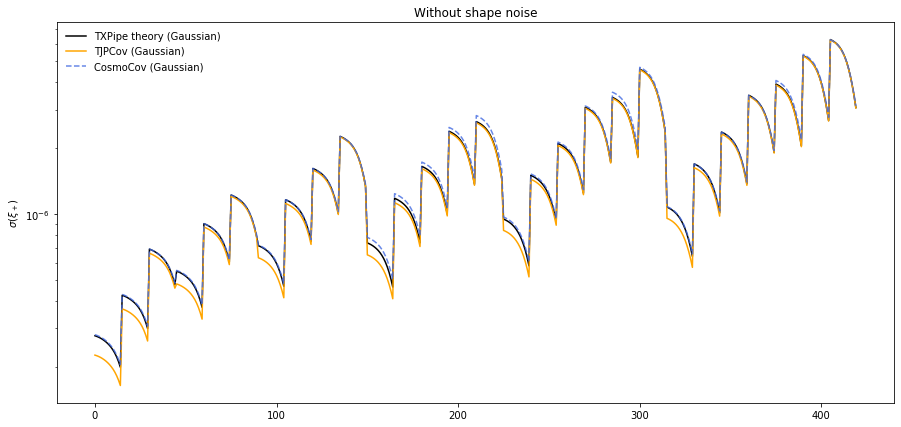

In [102]:
plt.figure(figsize = (15, 7))

plt.plot(np.arange(420), txpipe_xip, '-', color = 'black', label = 'TXPipe theory (Gaussian)')
plt.plot(np.arange(420), np.sqrt(np.diag(cov_tjp)), '-', color = 'orange', label = 'TJPCov (Gaussian)')
#plt.plot(np.arange(420), JK_xip, '-', color = 'teal', label = 'JK')
#plt.plot(np.arange(420), reorder_CosmoCov_xip_total, '-', color = 'firebrick', label = 'CosmoCov (Total)', alpha =0.8)
plt.plot(np.arange(420), reorder_CosmoCov_xip_g, '--', color = 'royalblue', label = 'CosmoCov (Gaussian)', alpha =0.8)
#plt.plot(np.arange(420), reorder_CosmoCov_xip_ng, '-', color = 'lightgray', label = 'CosmoCov (non-Gaussian)', alpha =0.8)



plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend(frameon=False)
plt.yscale('log')
plt.title('Without shape noise')
plt.savefig('../plots/cov_comparison_cosmocov_vs_txpipe_vs_tjpcov_theory_noSN.png', dpi = 400)

## Load Namaster cov from Jackie (no shape noise)

In [96]:
cov_na_diag = np.loadtxt('../data_vectors/cosmodc2/june_2021/7sbins_noshapenoise/namaster_covs/diag_cov_nmt.txt')
cov_tjp_diag = np.loadtxt('../data_vectors/cosmodc2/june_2021/7sbins_noshapenoise/namaster_covs/diag_cov_tjp.txt')

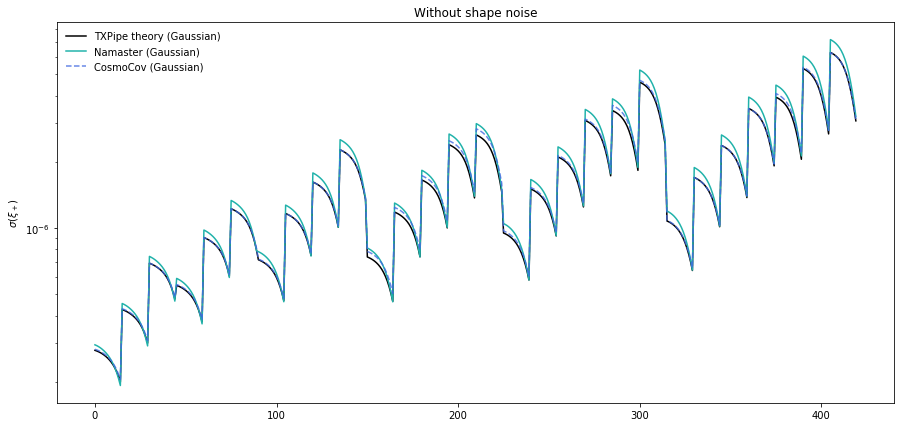

In [109]:
plt.figure(figsize = (15, 7))

plt.plot(np.arange(420), txpipe_xip, '-', color = 'black', label = 'TXPipe theory (Gaussian)')
#plt.plot(np.arange(420), np.sqrt(np.diag(cov_tjp)), '-', color = 'firebrick', label = 'TJPCov (Gaussian) old')
#plt.plot(np.arange(420), cov_tjp_diag, '--', color = 'orange', label = 'TJPCov (Gaussian)')
#plt.plot(np.arange(420), JK_xip, '-', color = 'firebrick', label = 'JK')
plt.plot(np.arange(420), cov_na_diag, '-', color = 'lightseagreen', label = 'Namaster (Gaussian)')
plt.plot(np.arange(420), reorder_CosmoCov_xip_g, '--', color = 'royalblue', label = 'CosmoCov (Gaussian)', alpha =0.8)


plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend(frameon=False)
plt.yscale('log')
plt.title('Without shape noise')
plt.savefig('../plots/cov_comparison_txpipe_vs_tjpcov_vs_namaster_noSN.png', dpi = 400)

## Load Namaster cov from Jackie (with shape noise)

In [17]:
cov_na_diag_sn = np.loadtxt('../data_vectors/cosmodc2/june_2021/7sbins/covariance_namaster/cov_xip.txt')

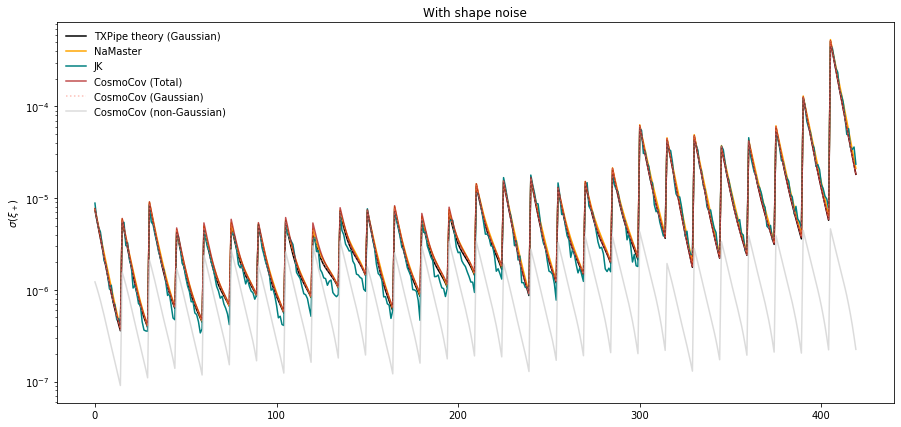

In [30]:
plt.figure(figsize = (15, 7))

plt.plot(np.arange(420), txpipe_xip_sn, '-', color = 'black', label = 'TXPipe theory (Gaussian)')
plt.plot(np.arange(420), cov_na_diag_sn, '-', color = 'orange', label = 'NaMaster', alpha = 1.)
plt.plot(np.arange(420), JK_xip_sn, '-', color = 'teal', label = 'JK')
plt.plot(np.arange(420), reorder_CosmoCov_xip_total_sn, '-', color = 'firebrick', label = 'CosmoCov (Total)', alpha = 0.8)
plt.plot(np.arange(420), reorder_CosmoCov_xip_g_sn, ':', color = 'salmon', label = 'CosmoCov (Gaussian)', alpha = 0.5)
plt.plot(np.arange(420), reorder_CosmoCov_xip_ng_sn, '-', color = 'lightgray', label = 'CosmoCov (non-Gaussian)', alpha = 0.8)


plt.ylabel(r'$\sigma(\xi_+$)')
plt.legend(frameon=False)
plt.yscale('log')
plt.title('With shape noise')
plt.savefig('../plots/cov_comparison_SN.png', dpi = 400, bbox_inches = 'tight',  pad_inches = 0.1)

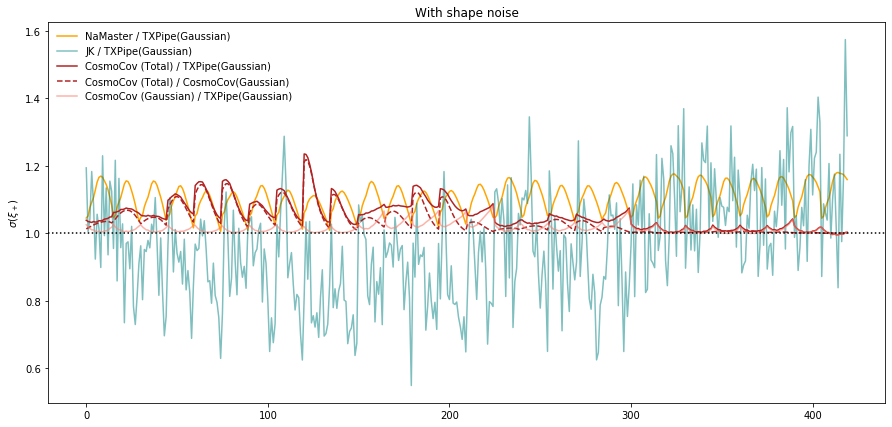

In [19]:
plt.figure(figsize = (15, 7))

plt.plot(np.arange(420), cov_na_diag_sn/txpipe_xip_sn, '-', color = 'orange', label = 'NaMaster / TXPipe(Gaussian)', alpha = 1.)
plt.plot(np.arange(420), JK_xip_sn/txpipe_xip_sn, '-', color = 'teal', label = 'JK / TXPipe(Gaussian)', alpha = 0.5)
plt.plot(np.arange(420), reorder_CosmoCov_xip_total_sn/txpipe_xip_sn, '-', color = 'firebrick', label = 'CosmoCov (Total) / TXPipe(Gaussian)', alpha = 1.)
plt.plot(np.arange(420), reorder_CosmoCov_xip_total_sn/reorder_CosmoCov_xip_g_sn, '--', color = 'firebrick', label = 'CosmoCov (Total) / CosmoCov(Gaussian)', alpha = 1.)

plt.plot(np.arange(420), reorder_CosmoCov_xip_g_sn/txpipe_xip_sn, '-', color = 'salmon', label = 'CosmoCov (Gaussian) / TXPipe(Gaussian)', alpha = 0.6)
#plt.plot(np.arange(420), reorder_CosmoCov_xip_ng_sn, '-', color = 'lightgray', label = 'CosmoCov (non-Gaussian)', alpha = 0.8)
#plt.plot(np.arange(420), cov_na_diag_sn, '-', color = 'orange', label = 'Namaster', alpha = 0.5)

plt.ylabel(r'$\sigma(\xi_+$)')
plt.axhline(y = 1, color = 'k', ls = ':')
plt.legend(frameon=False)
#plt.yscale('log')
plt.title('With shape noise')
plt.savefig('../plots/cov_comparison_SN_ratios.png', dpi = 400, bbox_inches = 'tight',  pad_inches = 0.1)